In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from cmi import *


In [4]:
def generate_mc(cor, n):
    """
    z -> x -> y
    here cmi should be known    
    """
    z = np.random.normal(0, 1, (n, 1))
    x = z * cor + np.random.normal(0, np.sqrt(1-cor**2), (n, 1))
    y = x * cor + np.random.normal(0, np.sqrt(1-cor**2), (n, 1))
    return x, y, z

In [9]:
from npeet.entropy_estimators import cmi




def digi(x):
    return 1 * (x >= 0) + -1 * (x < 0)

res = []
for cor in np.linspace(.1, 1, 10):
    for i in range(3):
        print(f"it: {i}")
        print(f"generating mc data")
        x, y, z = generate_mc(cor, 100000)
        print("diff")
        res.append({
            "type": "diff",
            "val": conditional_mutual_information(digi(x), digi(y), digi(z)),
            "it": i,
            "cor": cor
        })
        print("sampling knn")
        v2, vp = sample_q_knn(x, y, z)
        print("knn+MINE")
        res.append({
            "type": "kNN+fMINE",
            "val": divergence_based_cmi(v2, vp, 512).item(),
            "it": i,
            "cor": cor
        })
        print("knn+classif")
        res.append({
            "type": "kNN+classif",
            "val": classif_based_cmi(v2, vp),
            "it": i,
            "cor": cor
        })
        print("sampling cvae")
        v2, vp = sample_cvae(x, y, z)
        print("cvae+mine")
        res.append({
            "type": "cVAE+fMINE",
            "val": divergence_based_cmi(v2, vp, 512).item(),
            "it": i,
            "cor": cor
        })
        print("cvae+classif")
        res.append({
            "type": "cVAE+classif",
            "val": classif_based_cmi(v2, vp),
            "it": i,
            "cor": cor
        })
        print("npeet cmi")
        res.append({
            "type": "npeet",
            "val": cmi(x, y, z),
            "it": i,
            "cor": cor
        })

it: 0
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.5190303030303031
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9988787878787879
npeet cmi
it: 1
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.5174848484848484
sampling cvae
cvae+mine
cvae+classif
model acc: 0.995969696969697
npeet cmi
it: 2
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.5214848484848484
sampling cvae
cvae+mine
cvae+classif
model acc: 0.997560606060606
npeet cmi
it: 0
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.522969696969697
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9957727272727273
npeet cmi
it: 1
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.5298787878787878
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9965454545454545
npeet cmi
it: 2
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.5317878787878788
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9981

/tmp/ipykernel_72298/1220199948.py:180: RuntimeWarning: divide by zero encountered in divide
  l_w_f = (probs[f_index]/(1-probs[f_index]))[:, 1]


it: 1
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.6037272727272728
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9989090909090909
npeet cmi
it: 2
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.6013030303030303
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9994090909090909
npeet cmi


/tmp/ipykernel_72298/1220199948.py:180: RuntimeWarning: divide by zero encountered in divide
  l_w_f = (probs[f_index]/(1-probs[f_index]))[:, 1]


it: 0
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.6173636363636363
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9977727272727273
npeet cmi
it: 1
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.617030303030303
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9990454545454546
npeet cmi


/tmp/ipykernel_72298/1220199948.py:180: RuntimeWarning: divide by zero encountered in divide
  l_w_f = (probs[f_index]/(1-probs[f_index]))[:, 1]


it: 2
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.6183939393939394
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9991060606060606
npeet cmi
it: 0
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.6257878787878788
sampling cvae
cvae+mine
cvae+classif
model acc: 0.999439393939394
npeet cmi


/tmp/ipykernel_72298/1220199948.py:180: RuntimeWarning: divide by zero encountered in divide
  l_w_f = (probs[f_index]/(1-probs[f_index]))[:, 1]


it: 1
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.6294848484848485
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9994848484848485
npeet cmi


/tmp/ipykernel_72298/1220199948.py:180: RuntimeWarning: divide by zero encountered in divide
  l_w_f = (probs[f_index]/(1-probs[f_index]))[:, 1]


it: 2
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.6319393939393939
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9992727272727273
npeet cmi
it: 0
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.47354545454545455
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9988484848484849
npeet cmi
it: 1
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.4723636363636364
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9990757575757576
npeet cmi
it: 2
generating mc data
diff
sampling knn
knn+MINE
knn+classif
model acc: 0.47633333333333333
sampling cvae
cvae+mine
cvae+classif
model acc: 0.9994090909090909
npeet cmi


In [10]:
df = pd.DataFrame(res)
df.groupby(["type", "cor"])["val"].mean()

type          cor
cVAE+classif  0.1     14.747343
              0.2     16.311024
              0.3     15.929171
              0.4     16.025632
              0.5     15.568925
              0.6     15.896895
              0.7           inf
              0.8           inf
              0.9           inf
              1.0     16.888170
cVAE+fMINE    0.1    279.086614
              0.2    241.135946
              0.3    338.440664
              0.4    282.203868
              0.5    321.854513
              0.6    220.016927
              0.7    259.736313
              0.8    183.316978
              0.9    278.770437
              1.0    266.228536
diff          0.1      0.002077
              0.2      0.008340
              0.3      0.017277
              0.4      0.030364
              0.5      0.045235
              0.6      0.063303
              0.7      0.079134
              0.8      0.095162
              0.9      0.103277
              1.0      0.000000
kNN+classif   0.1     

In [9]:
for i in np.linspace(.1, .9, 9):
    print(f"c: {i}, cmi: {1/2*np.log(1+i**2)}")

c: 0.1, cmi: 0.004975165426584046
c: 0.2, cmi: 0.019610356576640665
c: 0.30000000000000004, cmi: 0.043088848120526206
c: 0.4, cmi: 0.0742100025591367
c: 0.5, cmi: 0.11157177565710488
c: 0.6, cmi: 0.15374234987398028
c: 0.7000000000000001, cmi: 0.19938805997868395
c: 0.8, cmi: 0.24734812091805355
c: 0.9, cmi: 0.2966634226388672


In [11]:
df[~df["type"].str.startswith("cVAE")].groupby(["type", "cor"])["val"].mean()

type         cor
diff         0.1    0.002077
             0.2    0.008340
             0.3    0.017277
             0.4    0.030364
             0.5    0.045235
             0.6    0.063303
             0.7    0.079134
             0.8    0.095162
             0.9    0.103277
             1.0    0.000000
kNN+classif  0.1   -0.027648
             0.2   -0.012735
             0.3    0.006433
             0.4    0.035582
             0.5    0.055412
             0.6    0.115308
             0.7    0.139268
             0.8    0.191551
             0.9    0.234118
             1.0   -0.011241
kNN+fMINE    0.1    0.004344
             0.2    0.020559
             0.3    0.043747
             0.4    0.070997
             0.5    0.109770
             0.6    0.149001
             0.7    0.202192
             0.8    0.244339
             0.9    0.295528
             1.0   -0.000016
npeet        0.1    0.007553
             0.2    0.031019
             0.3    0.061317
             0.4    0.1066

In [5]:
def generate_simulated(k, l, n):
    importants = np.random.normal(0, 1, (n, k))
    non_important = np.random.normal(0, 1, (n, l))
    y = (importants @ np.linspace(.1, 1, k)) / np.sum(np.linspace(.1, 1, k))
    y = y + np.random.normal(0, .2, n)
    return y, np.column_stack([importants, non_important])

y, x = generate_simulated(5, 5, 100)

In [9]:
res = []
for i in range(1):
    print(f"it: {i}")
    print(f"generating sim data")
    target, features = generate_simulated(10, 10, 100000)
    print("sampling knn")
    for j in range(20):
        y = target
        x = features[:, j]
        z = np.delete(features, j, axis=1)
        v2, vp = sample_q_knn(x, y, z)
        print("knn+MINE")
        res.append({
            "type": "kNN+fMINE",
            "val": divergence_based_cmi(v2, vp, 512, z.shape[1]).item(),
            "it": i,
            "col": j
        })
        print("knn+classif")
        res.append({
            "type": "kNN+classif",
            "val": classif_based_cmi(v2, vp),
            "it": i,
            "col": j
        })
        """ this is impossible to compute lol
        print("npeet cmi")
        res.append({
            "type": "npeet",
            "val": cmi(x, y, z),
            "it": i,
            "col": j
        })
        """

it: 0
generating sim data
sampling knn
knn+MINE
knn+classif
model acc: 0.4974848484848485
knn+MINE
knn+classif
model acc: 0.5016969696969698
knn+MINE
knn+classif
model acc: 0.5054242424242424
knn+MINE
knn+classif
model acc: 0.5054848484848485
knn+MINE
knn+classif
model acc: 0.5172121212121212
knn+MINE
knn+classif
model acc: 0.5222424242424243
knn+MINE
knn+classif
model acc: 0.5365757575757576
knn+MINE
knn+classif
model acc: 0.5407272727272727
knn+MINE
knn+classif
model acc: 0.5571212121212121
knn+MINE
knn+classif
model acc: 0.5712424242424242
knn+MINE
knn+classif
model acc: 0.4974545454545454
knn+MINE
knn+classif
model acc: 0.5031515151515151
knn+MINE
knn+classif
model acc: 0.5003333333333333
knn+MINE
knn+classif
model acc: 0.49187878787878786
knn+MINE
knn+classif
model acc: 0.5000909090909091
knn+MINE
knn+classif
model acc: 0.5046363636363637
knn+MINE
knn+classif
model acc: 0.5010606060606061
knn+MINE
knn+classif
model acc: 0.4936969696969697
knn+MINE
knn+classif
model acc: 0.49906060

In [10]:
sdf = pd.DataFrame(res)
sdf.groupby(["type", "col"])["val"].mean()

type         col
kNN+classif  0     -0.139613
             1     -0.134148
             2     -0.129126
             3     -0.118278
             4     -0.103045
             5     -0.101218
             6     -0.071251
             7     -0.038523
             8     -0.014737
             9      0.009505
             10    -0.147266
             11    -0.136608
             12    -0.139034
             13    -0.166178
             14    -0.130599
             15    -0.142745
             16    -0.134024
             17    -0.138659
             18    -0.141073
             19    -0.140216
kNN+fMINE    0      0.229106
             1      0.252078
             2     -0.000188
             3      0.264206
             4      0.268133
             5      0.280892
             6      0.307771
             7      0.326276
             8      0.377661
             9      0.384451
             10     0.235356
             11     0.233350
             12    -0.000113
             13     0.0000

In [11]:
sdf.to_csv("sdf.csv")

In [10]:
df = pd.read_csv("df.csv")

df

,Unnamed: 0,type,val,it,cor
0,0,diff,2.056331e-03,0,0.1
1,1,kNN+fMINE,4.759610e-03,0,0.1
2,2,kNN+classif,-2.830697e-02,0,0.1
3,3,cVAE+fMINE,3.005233e+02,0,0.1
4,4,cVAE+classif,1.432439e+01,0,0.1
...,...,...,...,...,...
175,175,kNN+fMINE,-3.457069e-05,2,1.0
176,176,kNN+classif,-8.358222e-03,2,1.0
177,177,cVAE+fMINE,2.878636e+02,2,1.0
178,178,cVAE+classif,1.774274e+01,2,1.0


Text(0, 0.5, 'CMI')

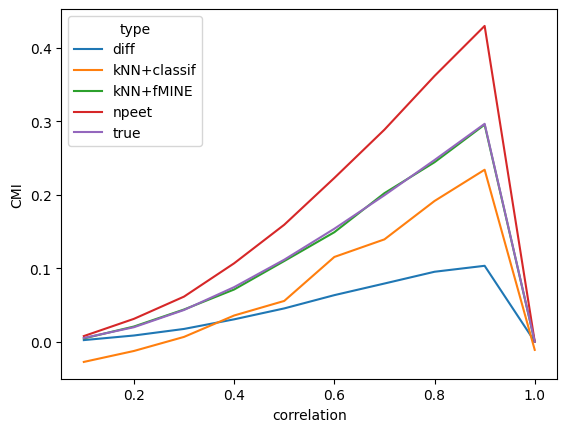

In [33]:
mean_val_df = df.groupby(["type", "cor"])["val"].mean().reset_index()
mean_val_df = mean_val_df[~mean_val_df["type"].str.startswith("cVAE")]

true_df = pd.DataFrame({"cor": np.linspace(.1, 1, 10), "val": [1/2*np.log(1+c**2) for c in np.linspace(.1, .9, 9)] + [0.]})
true_df["type"] = "true"
mean_val_df = pd.concat([mean_val_df, true_df], axis=0)
sns.lineplot(mean_val_df, x="cor", y="val", hue="type")
plt.xlabel("correlation")
plt.ylabel("CMI")

In [35]:
mean_val_df.shape

(50, 3)

In [41]:
squeezed = df.groupby(["type", "cor"])["val"].mean().reset_index()
extra = pd.DataFrame({"cor": np.linspace(.1, 1, 10), "val": [1/2*np.log(1+c**2) for c in np.linspace(.1, .9, 9)] + [0.], "type": "true"})
mean_val_df = pd.concat([squeezed, extra], axis=0).reset_index(drop=True)

<Axes: xlabel='cor', ylabel='val'>

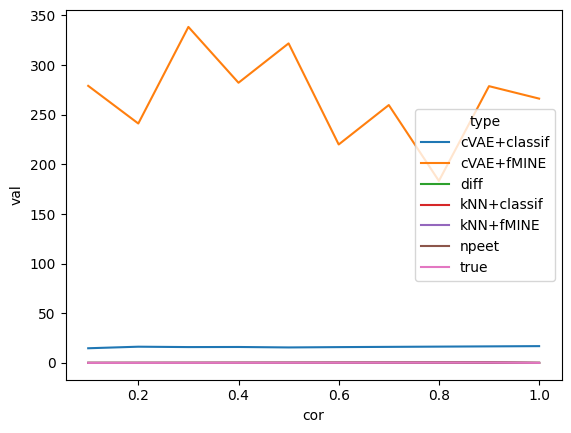

In [43]:
sns.lineplot(mean_val_df, x="cor", y="val", hue="type")

In [50]:
x, y, z = generate_mc(.5, 100000)
v2_knn, vp_knn = sample_q_knn(x, y, z)
v2_vae, vp_vae = sample_cvae(x, y, z)
y_t_knn = v2_knn[:, 1]
y_g_knn = vp_knn[:, 1]
y_t_vae = v2_vae[:, 1]
y_g_vae = vp_vae[:, 1]


<Axes: ylabel='Count'>

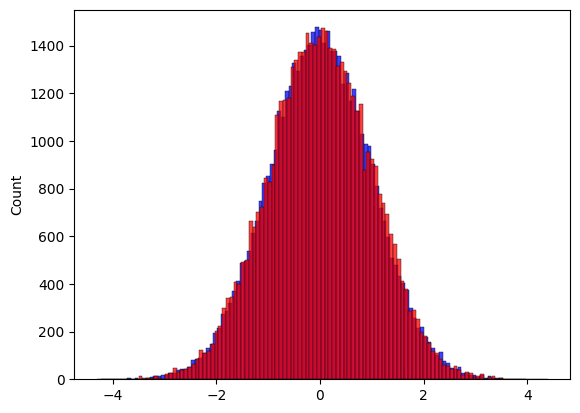

In [52]:
sns.histplot(y_t_knn, color="blue")
sns.histplot(y_g_knn, color="red")

<Axes: ylabel='Count'>

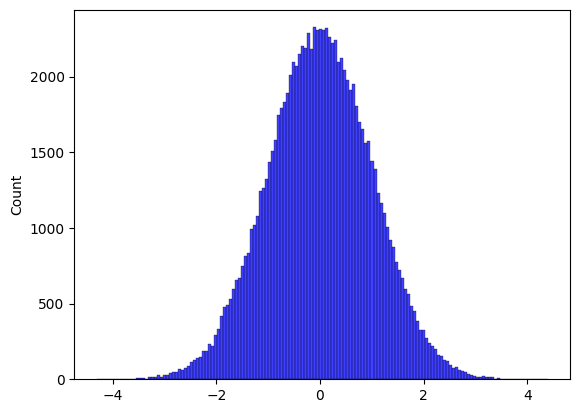

In [57]:
sns.histplot(y_t_vae, color="blue")


<Axes: ylabel='Count'>

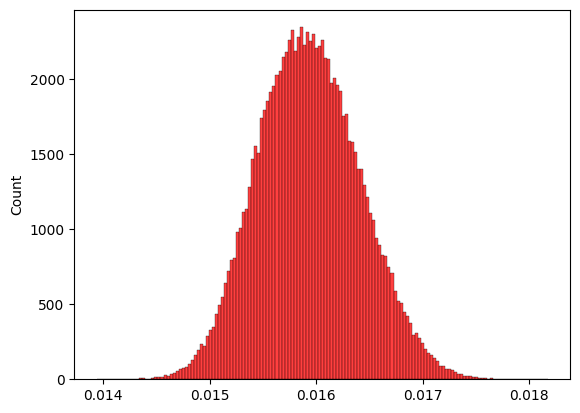

In [58]:
sns.histplot(y_g_vae, color="red")

In [12]:
sdf.groupby(["type", "col"])["val"].mean().sort_values(ascending=False)

type         col
kNN+fMINE    9      0.384451
             8      0.377661
             7      0.326276
             6      0.307771
             5      0.280892
             4      0.268133
             3      0.264206
             1      0.252078
             16     0.246735
             15     0.242823
             10     0.235356
             11     0.233350
             0      0.229106
             18     0.228982
kNN+classif  9      0.009505
kNN+fMINE    13     0.000005
             17    -0.000044
             19    -0.000096
             12    -0.000113
             2     -0.000188
             14    -0.000218
kNN+classif  8     -0.014737
             7     -0.038523
             6     -0.071251
             5     -0.101218
             4     -0.103045
             3     -0.118278
             2     -0.129126
             14    -0.130599
             16    -0.134024
             1     -0.134148
             11    -0.136608
             17    -0.138659
             12    -0.1390

In [6]:
data = arff.loadarff("dataset")
dataset = pd.DataFrame(data[0])
dataset
y = dataset["AverageTotalPayments"].values
x = dataset.drop("AverageTotalPayments", axis=1).values

model = LinearRegression()
model.fit(x[:, 2].reshape(-1, 1), y)
mean_squared_error(y, model.predict(x[:, 2].reshape(-1,1)))

0.0589178236637374

In [7]:
x.mean(axis=0)

array([   42.77630393, 36133.95843447,  8494.49517394])

In [8]:
y.mean()

8.991832040710895

In [16]:
rdf = pd.DataFrame(res)
rdf.groupby(["type", "col"])["val"].mean()

type         col
kNN+classif  0     -0.247715
             1     -0.248720
             2     -0.234156
kNN+fMINE    0     -0.000019
             1      0.000179
             2      0.000035
Name: val, dtype: float64